# LEAD SCORING CASE STUDY

# Importing Required Libraries

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from scipy import stats
from scipy.stats import mstats

# Reading And Understanding The Data

In [3]:
# Reading the dataset
leads = pd.read_csv("Leads.csv")

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

*The data set consist of 9240 rows and 37 columns.*

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
leads.duplicated().sum()

0

**The data set is free from the duplicate values.**

# Exploratory Data Analysis

## Handling Missing Values 

In [8]:
# Prospect ID - is a unique ID with which the customer is identified.And Lead Number is a number assigned to each lead procured.
# Dropping these columns since it has only unique values.

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [9]:
# Many columns contains 'select' values which is not indicating anything. So converting 'Select' values to NaN.

leads = leads.replace('Select', np.nan)

In [10]:
#  checking null values.

leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

**Many columns contains null values and it to be handled.**

In [11]:
#checking percentage of null values.

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [12]:
#dropping cols with more than 40% missing values

cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 40):
        leads.drop(i, 1, inplace = True)

In [13]:
#checking null values percentage

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [14]:
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [15]:
# imputing nan values in country with India

leads['Country'] = leads['Country'].replace(np.nan,'India')

In [16]:
leads['Country'].value_counts(dropna=False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

**The Number of Values for India are quite high than other values. This column can be dropped since it is highly skewed.**

In [17]:
leads.drop(['Country'],axis=1, inplace=True)

In [18]:
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [19]:
# imputing nan with mode value - mumbai
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

In [20]:
leads['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [21]:
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [22]:
# replacing NaN values  with 'Not Specified'

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

In [23]:
# combining Management Specializations into Management_Specializations.

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

In [24]:
leads['Specialization'].value_counts(dropna=False)

Management_Specializations           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
# imputing Nan values with mode "Unemployed"

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [27]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [29]:
#replacing Nan values with Mode - "Better Career Prospects"

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [30]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

**In this column, the people who want better career prospects are the most interested in the courses than others. And hence it is highly skewed. So dropping this column.**

In [31]:
leads.drop(['What matters most to you in choosing a course'],axis=1, inplace=True)

In [32]:
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [33]:
# replacing Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

In [34]:
#replacing tags with low frequency with "Other_Tags"

leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS',
                                       'Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 
                                       'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student',
                                       'Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student',
                                       'Not doing further education',
                                       'invalid number','wrong number given','Interested  in full time MBA'], 'Other_Tags')



In [35]:
leads['Tags'].value_counts(dropna=False)

Not Specified                          3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

In [36]:
#checking percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

In [37]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [38]:
# since facebook is a social media, adding it to the category 'social media'.
# Converting NaN to 'Others' along with other categories which having very less count.

leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace([np.nan,'bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                                                   

In [39]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [40]:
# NaN values - converting it into a category 'Others' along with other categories which having count less than 100.

leads['Last Activity'] = leads['Last Activity'].replace([np.nan,'Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [41]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [42]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

In [43]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
leads = leads.dropna()

In [44]:
#Checking percentage of Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

In [45]:
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

In [46]:
leads['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

*It shows that only 2 people said 'yes' and rest of the people prefered 'no'. Hence it is highly skewed and need to be dropped.*

In [47]:
leads.drop(['Do Not Call'],axis=1, inplace=True)

In [48]:
leads['Do Not Email'].value_counts(dropna=False)/len(leads['Do Not Email'])*100

No     92.046578
Yes     7.953422
Name: Do Not Email, dtype: float64

In [49]:
# Skewed variables that can be dropped

In [50]:
leads.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

*This column is also highly skewed since the ratio of no:yes = 9089:14. Dropping the column 'search*

In [51]:
leads.drop(['Search'],axis=1, inplace=True)

In [52]:
leads.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

*This column has only one value 'no'. So dropping the column.*

In [53]:
leads.drop(['Magazine'],axis=1, inplace=True)

In [54]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

*This column is also highly skewed since the ratioof no:yes = 9101:2. Dropping the column 'Newspaper Article'*

In [55]:
leads.drop(['Newspaper Article'],axis=1, inplace=True)

In [56]:
leads['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

*This column is also highly skewed since the ratio of no:yes = 9102:1. Dropping the column 'X Education Forums'*

In [57]:
leads.drop(['X Education Forums'],axis=1, inplace=True)

In [58]:
leads['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

*This column is also highly skewed since the ratio of no:yes = 9102:1. Dropping the column 'Newspaper'*

In [59]:
leads.drop(['Newspaper'],axis=1, inplace=True)

In [60]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

*This column is also highly skewed since the ratio of no:yes = 9099:4. Dropping the column 'Digital Advertisement'*

In [61]:
leads.drop(['Digital Advertisement'],axis=1, inplace=True)

In [62]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

*This column is also highly skewed since the ratio of no:yes = 9096:7. Dropping the column 'Through Recommendations'*

In [63]:
leads.drop(['Through Recommendations'],axis=1, inplace=True)

In [64]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

*Dropping the column since it has only one value - 'no'*


In [65]:
leads.drop(['Receive More Updates About Our Courses'],axis=1, inplace=True)

In [66]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

*Dropping the column since it has only one value - 'no'*


In [67]:
leads.drop(['Update me on Supply Chain Content'],axis=1, inplace=True)

In [68]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

*Dropping the column since it has only one value - 'no'*


In [69]:
leads.drop(['Get updates on DM Content'],axis=1, inplace=True)

In [70]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

*Dropping the column since it has only one value - 'no'*


In [71]:
leads.drop(['I agree to pay the amount through cheque'],axis=1, inplace=True)

In [72]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [73]:

leads['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [74]:
#combining lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Activity')

In [75]:

leads['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Activity              160
Name: Last Notable Activity, dtype: int64

In [76]:

leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

# Handling Outliers

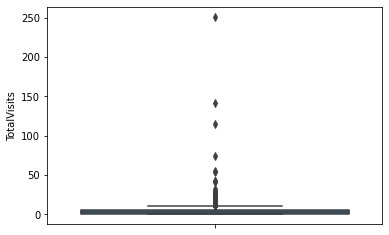

In [77]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

We can see presence of outliers here

In [78]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

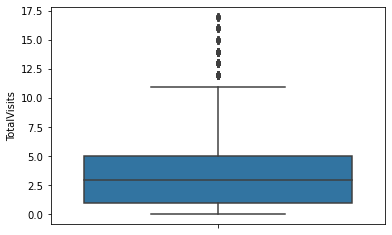

In [79]:
#cap the outliers at 1 percentile on the top and 99 percentile on the bottom

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [80]:
leads.shape

(9020, 14)

In [81]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

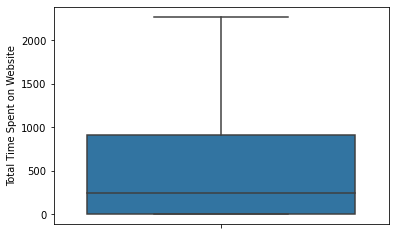

In [82]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

In [83]:
#checking spread of "Page Views Per Visit"

leads['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

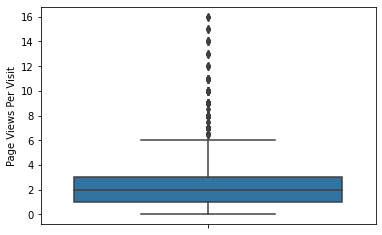

In [84]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

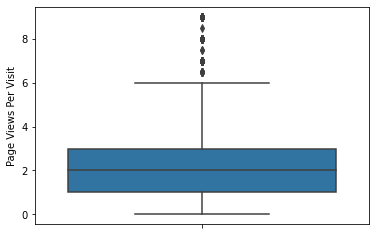

In [85]:
#cap at 1 and 99th percentile 
Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [86]:
leads.shape

(8953, 14)

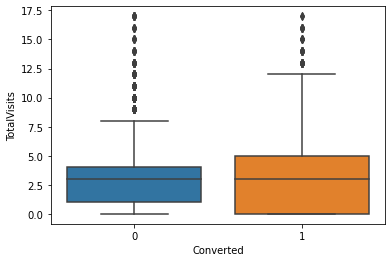

In [87]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

Inference
- Median for converted and not converted leads are the close.
- Nothng conclusive can be said on the basis of Total Visits

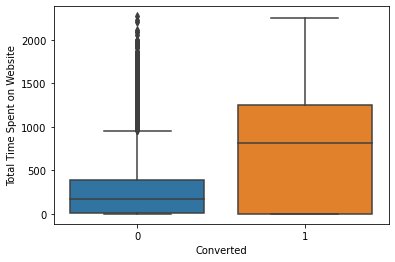

In [88]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

Inference
- Leads spending more time on the website are more likely to be converted.
- Website should be made more engaging to make leads spend more time.

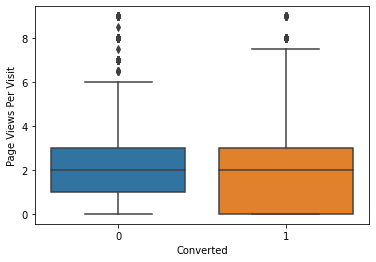

In [89]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

Inference
- Median for converted and unconverted leads is the same.
- Nothing can be said specifically for lead conversion from Page Views Per Visit

# Visualisation And Analysis

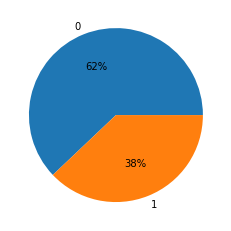

In [90]:
#Check the % of Data that has Converted Values = 1:
plt.pie(leads['Converted'].value_counts(),labels = ['0','1'], autopct='%.0f%%')
plt.show()

#### Only 38% of the leads are getting converted and 62% are not getting converted.

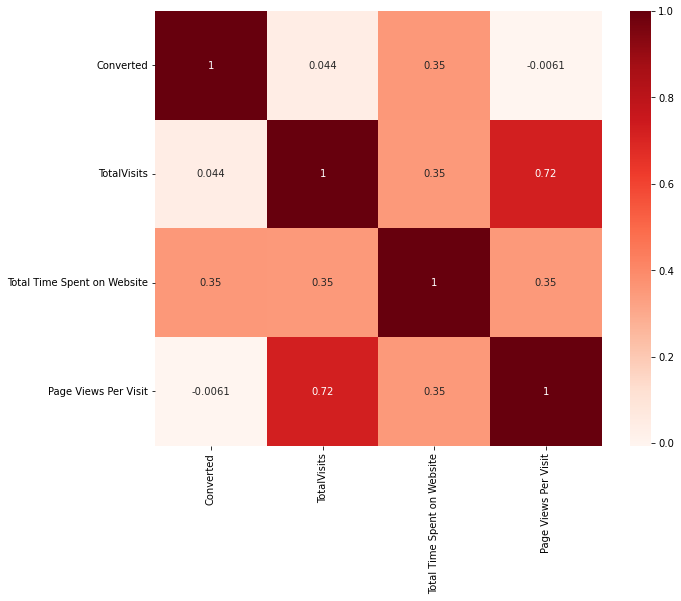

In [91]:
# Checking correlations of numeric values

plt.figure(figsize=(10,8))
sns.heatmap(leads.corr(), cmap="Reds", annot=True)
plt.show()

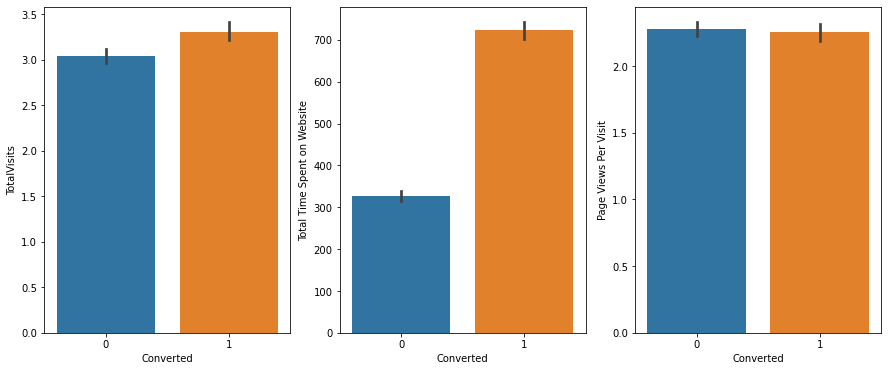

In [92]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.barplot(data=leads,x='Converted', y='TotalVisits')
plt.subplot(1,3,2)
sns.barplot(data=leads,x='Converted', y='Total Time Spent on Website')
plt.subplot(1,3,3)
sns.barplot(data=leads,x='Converted', y='Page Views Per Visit')
plt.show()

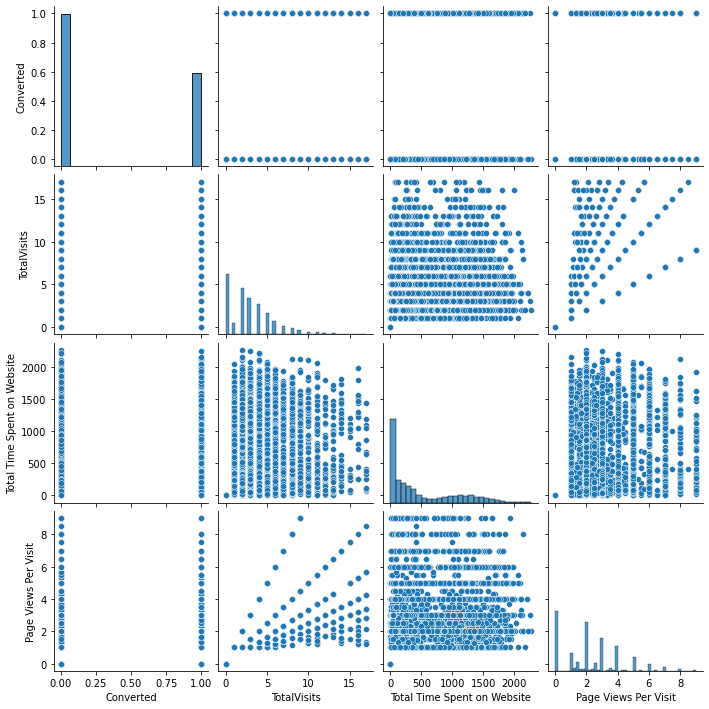

In [93]:
sns.pairplot(data=leads, vars=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit' ])
plt.show()

*Inferences :*
- totalVisits is highly correlated with Page views Per visit (0.72).
- followed by Total Time Spent on Website & converted , Total Time Spent on Website & Totalvisits, Total Time Spent on Website & page views per visit (0.35).

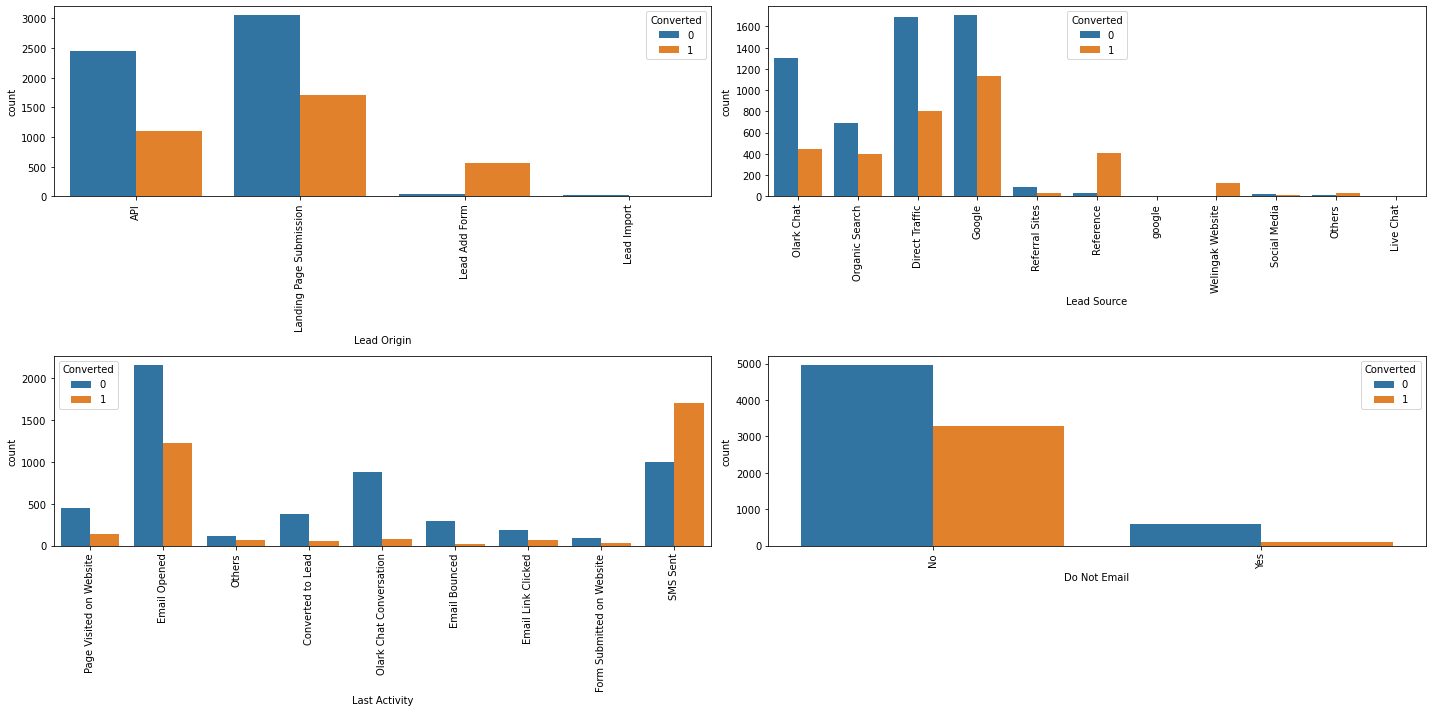

In [94]:
# plotting
cols = ['Lead Origin','Lead Source','Last Activity','Do Not Email']
plt.figure(figsize=(20, 10))

for i, col in enumerate(cols):
    ax = plt.subplot(2, 2, i+1)
    sns.countplot(data=leads, x=col, hue= 'Converted', ax=ax)
    
    plt.xticks(rotation = 90)
    plt.tight_layout()

*Inferences :*
- Lead origin - landing page submission has most number of converted followed by api.
- Lead source - Google has highest number of converted followed by direct traffic.
- The leads whose last activity is 'sms sent' is highly converted followed by 'email opened'.
- Those who opted 'no' on Do Not Email , highly converted than those who opted 'yes'.  
    

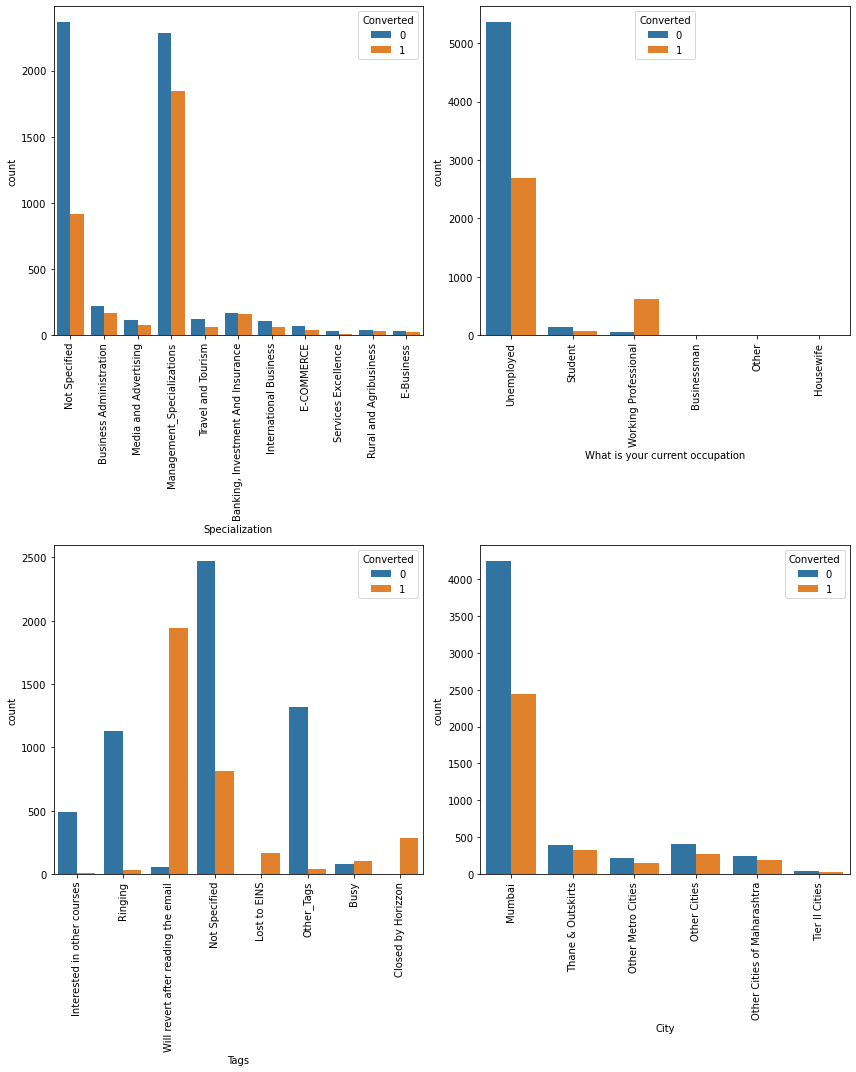

In [95]:
cols = ['Specialization','What is your current occupation','Tags','City']
plt.figure(figsize=(12, 15))

for i, col in enumerate(cols):
    ax = plt.subplot(2, 2, i+1)
    sns.countplot(data=leads, x=col, hue= 'Converted', ax=ax)
    
    plt.xticks(rotation = 90)
    plt.tight_layout()

*Inferences :*
- Leads who worked in the management industry domain shows high converting tendency.
- Leads who are unemployed have highly converted than others.
- Leads who revert after reading the mail, converts highly.
- Leads from city - Mumbai showing high converting tendency.

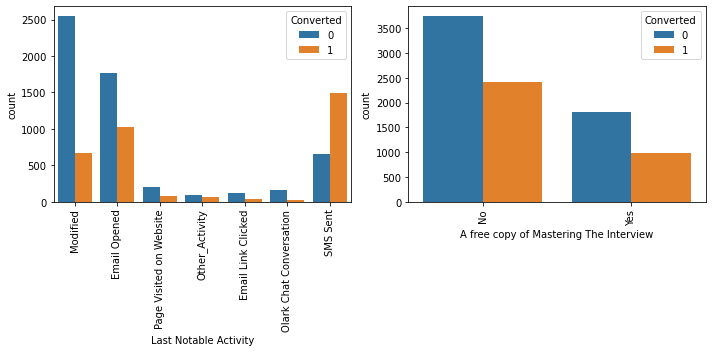

In [96]:
cols = ['Last Notable Activity','A free copy of Mastering The Interview']
plt.figure(figsize=(10, 5))

for i, col in enumerate(cols):
    ax = plt.subplot(1, 2, i+1)
    sns.countplot(data=leads, x=col, hue= 'Converted', ax=ax)
    
    plt.xticks(rotation = 90)
    plt.tight_layout()

*Inferences :*
- If 'sms sent' is the last notable activity performed by the student, the chance of convertion is high.
- If a lead/customer opts 'no' for a free copy of mastering the interview, the chance of convertion is high.

In [97]:
leads.shape

(8953, 14)

*Inference:*
- After Cleaning and handling outliers we are left with 8953 rows and 14 cols.

## Dummy Variable Creation:

In [98]:
#getting a list of categorical columns

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [99]:
# we have 2 yes/no cols we need to map it to 0 and 1

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [100]:
#getting dummies and dropping the first column and adding the results to leads
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],1)

In [101]:
# removing dummy column with nan values and concatinating with leads.

dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [102]:
# removing dummy column with nan values and irrelevent categories and concatinating with leads.

dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [103]:
#getting dummies and dropping the first column and adding the results to leads

dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity',drop_first=True)

leads = pd.concat([leads, dummy], axis = 1)

In [104]:
#getting dummies and dropping the first column and adding the results to leads

dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity',drop_first=True)

leads = pd.concat([leads, dummy], axis = 1)

In [105]:
# removing dummy column with nan values and concatinating with leads.

dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [106]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [107]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Other_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Train-Test Split 

In [108]:
# Putting response variable to y
y = leads['Converted']

y.head()

X=leads.drop('Converted', axis=1)

In [109]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [110]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

### Scaling of Data:

In [111]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']]) 

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Other_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### Model Building 

In [112]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [113]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True])

In [114]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('What is your current occupation_Housewife', False, 26),
 ('What is your current occupation_Other', False, 35),
 ('What is your current occupation_Student', False, 20),
 ('What is your current occupation_Unemployed', False, 18),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 19),
 ('City_Other Cities of Maharashtra', False, 38),
 ('City_Other Metro Cities', False, 42),
 ('City_Thane & Outskirts', False, 39),
 ('City_Tier II Cities', False, 25),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 40),
 ('Specialization_E-Business', False, 36),
 ('Specialization_E-COMMERCE', False, 24),
 ('Specialization_International Business', Fals

In [115]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Last Notable Activity_Other_Activity',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [116]:
#list of RFE non-supported columns

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Sour

## Model -1

In [117]:
#building model-1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1227.2
Date:                Tue, 08 Nov 2022   Deviance:                       2454.3
Time:                        13:45:16   Pearson chi2:                 7.59e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6082
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3817      0.139    -17.153      0.000      -2.654      -2.110
Total Time Spent on Website                              0.9814      0.055     17.735      0.000       0.873       1.090
Lead Origin_Landing Page Submission                     -1.0585      0.118     -8.977      0.000      -1.290      -0.827
Lead Origin_Lead Add Form                                1.2624      0.446      2.833      0.005       0.389       2.136
What is your current occupation_Working Professional     1.0129      0.410      2.472      0.013       0.210       1.816
Lead Source_Welingak Website                             4.1674      1.111      3.751      0.000       1.990       6.345
Last Activity_Email Opened                               1.4698      0.152      9.639      0.000       1.171       1.769
Last Activity_SMS Sent                                   1.5527      0.230      6.748      0.000       1.102       2.004
Last Notable Activity_Other_Activity                     1.4981      0.395      3.790      0.000       0.723       2.273
Last Notable Activity_SMS Sent                           2.2388      0.216     10.365      0.000       1.815       2.662
Tags_Closed by Horizzon                                  6.7462      1.017      6.631      0.000       4.752       8.740
Tags_Interested in other courses                        -2.5407      0.408     -6.223      0.000      -3.341      -1.740
Tags_Lost to EINS                                        5.6410      0.615      9.165      0.000       4.435       6.847
Tags_Other_Tags                                         -2.4130      0.211    -11.413      0.000      -2.827      -1.999
Tags_Ringing                                            -3.5111      0.245    -14.359      0.000      -3.990      -3.032
Tags_Will revert after reading the email                 4.4511      0.194     22.938      0.000       4.071       4.831
========================================================================================================================
"""

**p-values for all features are less than 0.05 and hence under control.**

In [118]:
# checking the VIF for model -1

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_SMS Sent,5.55
8,Last Notable Activity_SMS Sent,5.18
1,Lead Origin_Landing Page Submission,2.27
14,Tags_Will revert after reading the email,2.07
2,Lead Origin_Lead Add Form,1.91
5,Last Activity_Email Opened,1.71
4,Lead Source_Welingak Website,1.36
13,Tags_Ringing,1.35
3,What is your current occupation_Working Profes...,1.31
12,Tags_Other_Tags,1.29


**The vif of 'Last Activity_SMS Sent' is high. So dropping it.**

In [119]:
col = col.drop('Last Activity_SMS Sent',1)

## Model -2

In [120]:
#building model-2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1248.6
Date:                Tue, 08 Nov 2022   Deviance:                       2497.2
Time:                        13:45:16   Pearson chi2:                 7.80e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6055
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0086      0.115    -17.448      0.000      -2.234      -1.783
Total Time Spent on Website                              0.9908      0.055     18.038      0.000       0.883       1.098
Lead Origin_Landing Page Submission                     -0.9873      0.117     -8.464      0.000      -1.216      -0.759
Lead Origin_Lead Add Form                                1.4256      0.435      3.280      0.001       0.574       2.277
What is your current occupation_Working Professional     1.0205      0.413      2.469      0.014       0.210       1.831
Lead Source_Welingak Website                             4.1554      1.106      3.758      0.000       1.988       6.323
Last Activity_Email Opened                               1.0753      0.132      8.175      0.000       0.818       1.333
Last Notable Activity_Other_Activity                     1.0995      0.386      2.850      0.004       0.343       1.856
Last Notable Activity_SMS Sent                           3.3822      0.154     22.008      0.000       3.081       3.683
Tags_Closed by Horizzon                                  6.6250      1.016      6.523      0.000       4.635       8.615
Tags_Interested in other courses                        -2.6030      0.405     -6.421      0.000      -3.398      -1.809
Tags_Lost to EINS                                        5.4970      0.607      9.052      0.000       4.307       6.687
Tags_Other_Tags                                         -2.4427      0.211    -11.585      0.000      -2.856      -2.029
Tags_Ringing                                            -3.5327      0.245    -14.407      0.000      -4.013      -3.052
Tags_Will revert after reading the email                 4.3580      0.189     23.083      0.000       3.988       4.728
========================================================================================================================
"""

In [121]:
# Check for the VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.16
13,Tags_Will revert after reading the email,2.05
2,Lead Origin_Lead Add Form,1.90
7,Last Notable Activity_SMS Sent,1.69
5,Last Activity_Email Opened,1.65
4,Lead Source_Welingak Website,1.36
12,Tags_Ringing,1.35
3,What is your current occupation_Working Profes...,1.31
11,Tags_Other_Tags,1.29
8,Tags_Closed by Horizzon,1.24


**Now all p-values and vif values are under control. but the vif value of 'Lead Origin_Landing Page Submission' is a little high. So dropping it.**

## Model -3

In [122]:
col = col.drop('Lead Origin_Landing Page Submission',1)

In [123]:
#building model-3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1286.6
Date:                Tue, 08 Nov 2022   Deviance:                       2573.2
Time:                        13:45:17   Pearson chi2:                 7.39e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6007
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3902      0.108    -22.057      0.000      -2.603      -2.178
Total Time Spent on Website                              0.8653      0.052     16.759      0.000       0.764       0.966
Lead Origin_Lead Add Form                                1.9169      0.427      4.484      0.000       1.079       2.755
What is your current occupation_Working Professional     0.8848      0.395      2.241      0.025       0.111       1.659
Lead Source_Welingak Website                             3.9836      1.103      3.611      0.000       1.821       6.146
Last Activity_Email Opened                               1.0220      0.130      7.871      0.000       0.768       1.276
Last Notable Activity_Other_Activity                     0.9932      0.372      2.668      0.008       0.264       1.723
Last Notable Activity_SMS Sent                           3.2508      0.150     21.723      0.000       2.957       3.544
Tags_Closed by Horizzon                                  6.3821      1.015      6.288      0.000       4.393       8.371
Tags_Interested in other courses                        -2.4275      0.396     -6.135      0.000      -3.203      -1.652
Tags_Lost to EINS                                        5.2436      0.602      8.706      0.000       4.063       6.424
Tags_Other_Tags                                         -2.6006      0.208    -12.525      0.000      -3.008      -2.194
Tags_Ringing                                            -3.6591      0.242    -15.119      0.000      -4.133      -3.185
Tags_Will revert after reading the email                 4.1447      0.183     22.644      0.000       3.786       4.503
========================================================================================================================
"""

In [124]:
# Check for the VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Tags_Will revert after reading the email,1.97
1,Lead Origin_Lead Add Form,1.80
6,Last Notable Activity_SMS Sent,1.56
4,Last Activity_Email Opened,1.47
3,Lead Source_Welingak Website,1.35
2,What is your current occupation_Working Profes...,1.31
11,Tags_Ringing,1.24
7,Tags_Closed by Horizzon,1.21
0,Total Time Spent on Website,1.19
10,Tags_Other_Tags,1.14


**Now the p-values are less than 0.05 and vif values are less than 2. And no need to drop any features further.**

## Prediction On Train data

In [125]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.231586
4696    0.055661
3274    0.575670
2164    0.007023
1667    0.979474
7024    0.106898
8018    0.041296
778     0.049563
6942    0.003187
4440    0.160403
dtype: float64

In [126]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23158561, 0.05566086, 0.5756697 , 0.0070233 , 0.97947439,
       0.10689805, 0.04129583, 0.04956299, 0.00318719, 0.16040276])

In [127]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.231586,9196
1,0,0.055661,4696
2,0,0.575670,3274
3,0,0.007023,2164
4,1,0.979474,1667


In [128]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.231586,9196,0
1,0,0.055661,4696,0
2,0,0.575670,3274,1
3,0,0.007023,2164,0
4,1,0.979474,1667,1


In [129]:


# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3691  191]
 [ 289 2096]]


In [130]:
# Accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9234083293441838


In [131]:
# true positive TP
TP = confusion[1,1] 
# true negatives
TN = confusion[0,0] 
# false positives
FP = confusion[0,1] 
# false negatives
FN = confusion[1,0] 

In [132]:
# Sensitivity 
TP / float(TP+FN)

0.8788259958071278

In [133]:
# Specificity
TN / float(TN+FP)

0.9507985574446162

In [134]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04920144255538382


In [135]:
# positive predictive value 
print (TP / float(TP+FP))

0.9164844774814167


In [136]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9273869346733669


### PLOTTING ROC CURVE

In [137]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [138]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

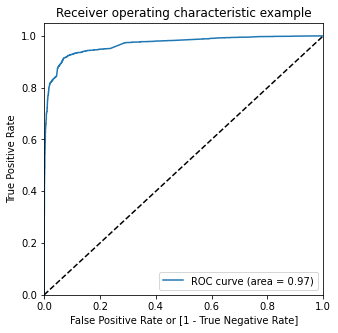

In [139]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

## Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that: 

In [140]:

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.231586,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.055661,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.575670,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.007023,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.979474,1667,1,1,1,1,1,1,1,1,1,1,1


In [141]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.808840  0.974004  0.707367
0.2   0.2  0.909845  0.929140  0.897991
0.3   0.3  0.923887  0.914885  0.929418
0.4   0.4  0.922291  0.893920  0.939722
0.5   0.5  0.923408  0.878826  0.950799
0.6   0.6  0.916547  0.830608  0.969346
0.7   0.7  0.917185  0.815094  0.979907
0.8   0.8  0.908888  0.786583  0.984029
0.9   0.9  0.882400  0.705241  0.991242


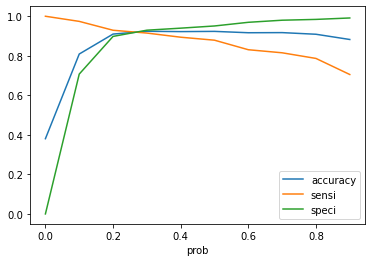

In [142]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [143]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.231586,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.055661,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.575670,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.007023,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.979474,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [144]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.231586,9196,0,23
1,0,0.055661,4696,0,6
2,0,0.575670,3274,1,58
3,0,0.007023,2164,0,1
4,1,0.979474,1667,1,98


In [145]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9238870272857826

In [146]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3608,  274],
       [ 203, 2182]], dtype=int64)

In [147]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [148]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9148846960167715

In [149]:
# Let us calculate specificity
TN / float(TN+FP)

0.9294178258629573

### Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:
- Accuracy : 92.38%
- Sensitivity : 91.48%
- Specificity : 92.94%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall. 

In [150]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.07058217413704276


In [151]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8884364820846905


In [152]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9467331409078982


In [153]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3608,  274],
       [ 203, 2182]], dtype=int64)

In [154]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8884364820846905

In [155]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9148846960167715

In [156]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8884364820846905

In [157]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9148846960167715

### Precision - Recall curve

In [158]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

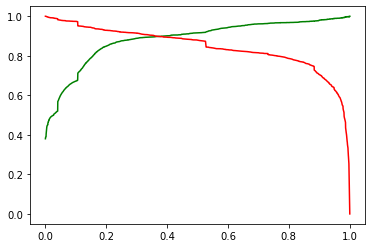

In [159]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**From the precision - recall trade off, we can see that the optimal cut off is close to 0.3**

## Prediction On Test Set 

In [160]:
#scaling test set


X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']]) 

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Other_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [161]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Lead Source_Welingak Website,Last Activity_Email Opened,Last Notable Activity_Other_Activity,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,0,0,0,0,0,1,0,0,0,0,1,0
984,-0.550262,0,0,0,0,0,0,0,0,0,1,0,0
8135,0.812462,0,0,0,0,0,1,0,0,0,0,0,0
6915,-0.628665,0,0,0,1,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,0,1,0,0,0,0,0,0,0,1


In [162]:
X_test_sm = sm.add_constant(X_test)

### PREDICTIONS ON TEST SET

In [163]:
y_test_pred = res.predict(X_test_sm)

In [164]:
y_test_pred[:10]

7681    0.044453
984     0.004207
8135    0.826873
6915    0.003791
2712    0.917724
244     0.002839
4698    0.003385
8287    0.040626
6791    0.966060
8970    0.006248
dtype: float64

In [165]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [166]:
# Let's see the head
y_pred_1.head()

,0
7681,0.044453
984,0.004207
8135,0.826873
6915,0.003791
2712,0.917724


In [167]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [168]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [169]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [170]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [171]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.044453
1,0,984,0.004207
2,0,8135,0.826873
3,0,6915,0.003791
4,1,2712,0.917724


In [172]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [173]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.044453
1,0,984,0.004207
2,0,8135,0.826873
3,0,6915,0.003791
4,1,2712,0.917724


In [174]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [175]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.044453,4
1,984,0,0.004207,0
2,8135,0,0.826873,83
3,6915,0,0.003791,0
4,2712,1,0.917724,92


In [176]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [177]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.044453,4,0
1,984,0,0.004207,0,0
2,8135,0,0.826873,83,1
3,6915,0,0.003791,0,0
4,2712,1,0.917724,92,1


In [178]:
y_pred_final['Lead_Score'].value_counts().sort_index()

0      362
1      255
2       73
3       59
4      237
      ... 
96      32
97      33
98      86
99     189
100    318
Name: Lead_Score, Length: 98, dtype: int64

In [179]:
Converted_to_yes=y_pred_final[y_pred_final['final_Predicted']==1]
Converted_to_yes
Converted_to_yes['Lead_Score'].value_counts().sort_index()

30       4
31       3
32       3
33       3
34       4
      ... 
96      32
97      33
98      86
99     189
100    318
Name: Lead_Score, Length: 68, dtype: int64

In [180]:
Converted_to_No=y_pred_final[y_pred_final['final_Predicted']==0]
Converted_to_No
Converted_to_No['Lead_Score'].value_counts().sort_index()

0     362
1     255
2      73
3      59
4     237
5     100
6      59
7      39
8      32
9      15
10     17
11    143
12     34
13     35
14     31
15     28
16     22
17     21
18     22
19     10
20     11
21     11
22      9
23      5
24      5
25     10
26      4
27      4
28      6
29      1
30      2
Name: Lead_Score, dtype: int64

In [181]:
y_pred_final[y_pred_final['Lead_Score']==30]

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
1029,5544,0,0.302727,30,1
1314,7042,0,0.296360,30,0
1604,6874,0,0.299853,30,0
1810,363,0,0.303659,30,1
1925,7060,0,0.302387,30,1
2625,4180,1,0.301025,30,1


**lead score = current probability * 100**

**The cutoff for test data set as 0.3 that is the leads with conversion probability greater than 0.3 will be predicted as converted and those below 0.3 will be predicted as not converted.**

In [182]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9270290394638868

In [183]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1571,  105],
       [  91,  919]], dtype=int64)

In [184]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [185]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9099009900990099

In [186]:
# Let us calculate specificity
TN / float(TN+FP)

0.9373508353221957

In [187]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8974609375

In [188]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9099009900990099

In [189]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Notable Activity_Other_Activity',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

### Features influencing convertion rate

- Total Time Spent on Website
- Lead Origin - Lead Add Form
- What is your current occupation - Working Professional
- Lead Source - Welingak Website
- Last Activity - Email Opened
- Last Notable Activity - Other_Activity
- Last Notable Activity - SMS Sent
- Tags - Closed by Horizzon
- Tags - Interested in other courses
- Tags - Lost to EINS
- Tags - Other_Tags
- Tags - Ringing
- Tags - Will revert after reading the email

## Final Observation:

###  Train Data: 
- Accuracy : 92.38%
- Sensitivity : 91.48%
- Specificity : 92.94%
- Precision_score : 88.84%
- Recall_score : 91.48%

###  Test Data: 
- Accuracy : 92.70%
- Sensitivity : 90.99%
- Specificity : 93.73%
- Precision_score : 89.74%
- Recall_score : 90.99%

### The Model seems to predict the Conversion Rate well